In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data=pd.read_csv("armspans2022_gender.csv")
armspan=data.dropna(axis=0)
print(armspan.head())
x=armspan.iloc[:,0].values
y=armspan.iloc[:,1].values
X=pd.DataFrame(armspan.iloc[:,0].values)
Y=pd.DataFrame(armspan.iloc[:,1].values)

   height  armspan  is.female compmother      compfather
0   74.00     76.0          0     Taller          Taller
1   65.00     65.0          0     Taller  About the same
2   60.00     53.0          1    Shorter         Shorter
3   69.75     69.0          0     Taller  About the same
4   70.00     72.0          0     Taller  About the same


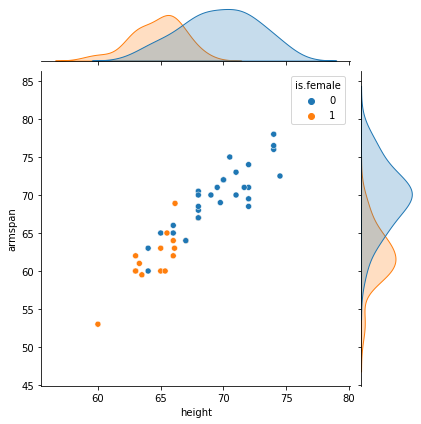

In [2]:
sns.jointplot(data=data, x="height", y="armspan",hue="is.female")

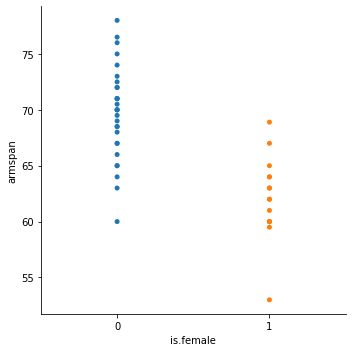

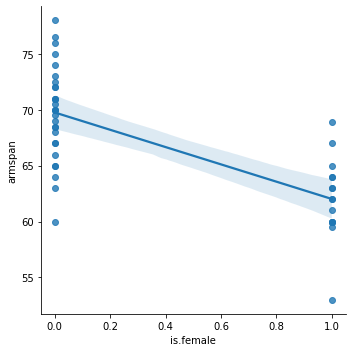

In [3]:
sns.catplot(x="is.female", y="armspan", jitter=False, data=armspan)
sns.lmplot(x="is.female", y="armspan", data=armspan);

In [4]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, Y)
accuracy = reg.score(X, Y)
print('R^2 = '+ str(accuracy))

R^2 = 0.8491070086674264


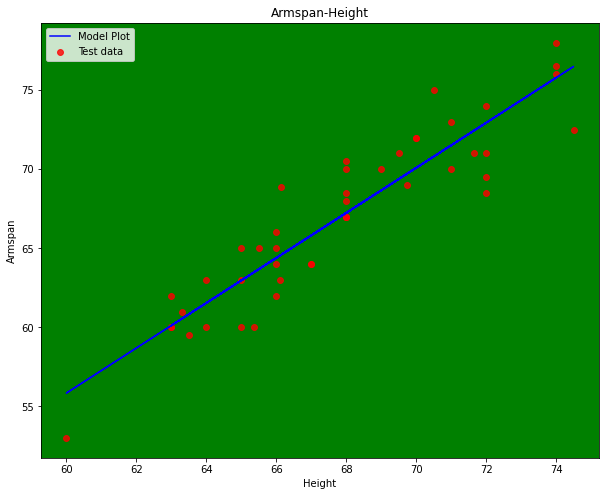

In [5]:
plt.figure(figsize=(10, 8))
plt.axes().set_facecolor("green")
plt.scatter(x, y, color = 'red', marker = 'o', s = 35, alpha = 0.8,
          label = 'Test data')
plt.plot(x, reg.predict(X), color = 'blue', label='Model Plot')
plt.title('Armspan-Height')
plt.xlabel('Height')
plt.ylabel('Armspan')
plt.legend(loc='upper left')
plt.show()

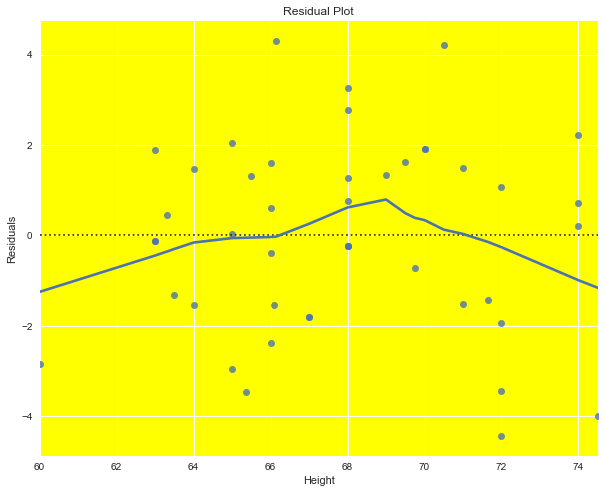

In [55]:
plt.figure(figsize=(10, 8))
plt.axes().set_facecolor("yellow")
sns.residplot(x='height', y='armspan',lowess = True, data=armspan)
plt.title('Residual Plot')
plt.xlabel('Height')
plt.ylabel('Residuals')
plt.show()

In [7]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
LM=ols('armspan ~ height', data=armspan).fit()

In [8]:
print(LM.summary())

                            OLS Regression Results                            
Dep. Variable:                armspan   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     242.0
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           2.87e-19
Time:                        00:05:59   Log-Likelihood:                -96.967
No. Observations:                  45   AIC:                             197.9
Df Residuals:                      43   BIC:                             201.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -29.6353      6.221     -4.764      0.0

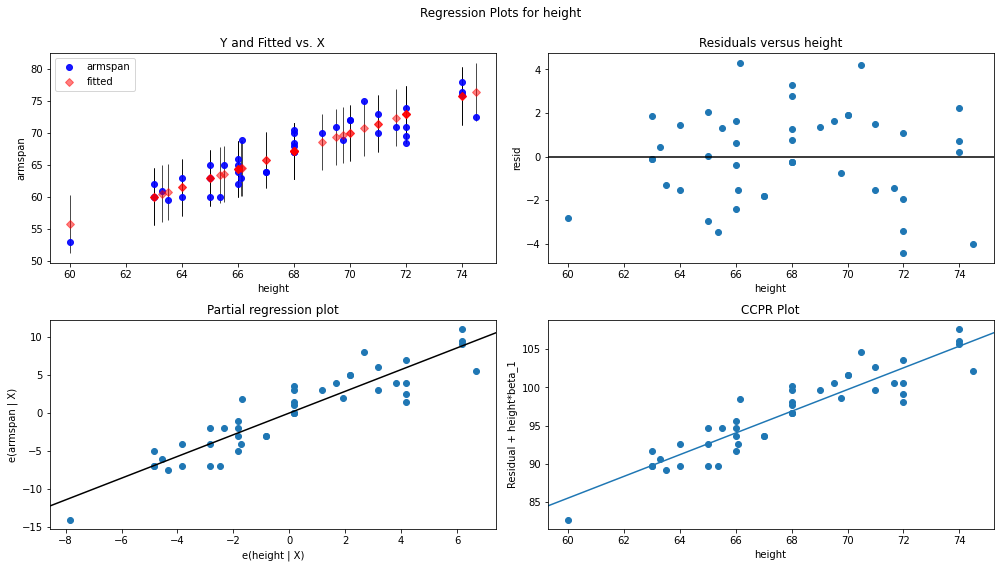

In [11]:
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(LM,'height', fig=fig)

Text(0.5, 1.0, 'Residuals vs Leverage Plot')

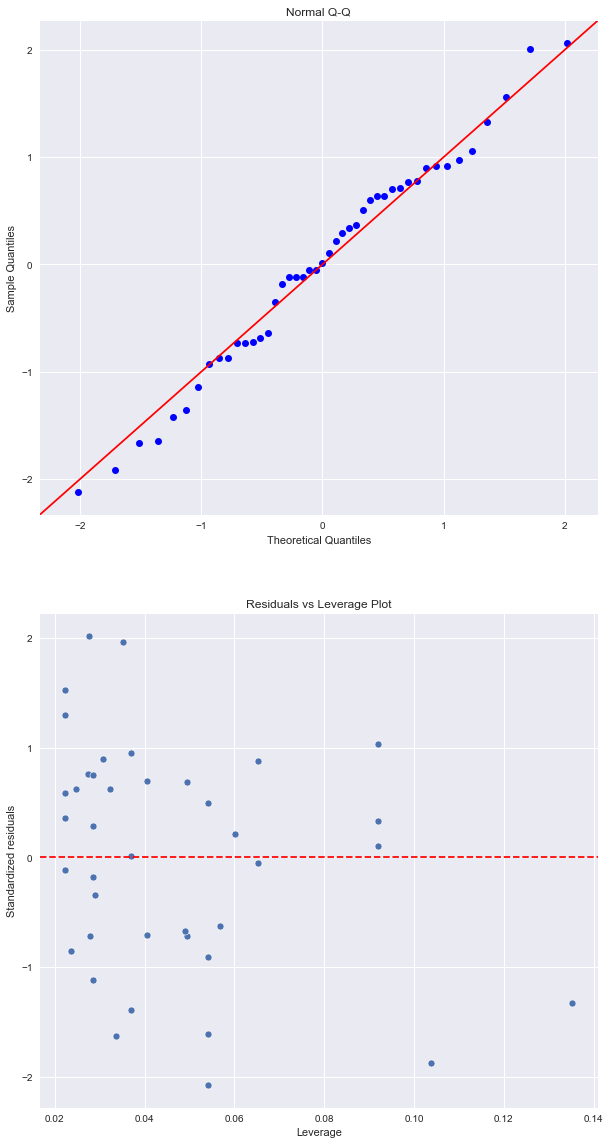

In [48]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,20)
fig, ax = plt.subplots(nrows=2, ncols=1)
plt.style.use('seaborn')

fitted_value = LM.fittedvalues
residuals = LM.resid
stand_resids = LM.resid_pearson
influence = LM.get_influence()
leverage = influence.hat_matrix_diag

sm.qqplot(residuals, fit=True, line='45',ax=ax[0], color='red')
ax[0].set_title('Normal Q-Q')

sns.scatterplot(x=leverage, y=stand_resids, ax=ax[1])
ax[1].axhline(y=0, color='red', linestyle='dashed')
ax[1].set_xlabel('Leverage')
ax[1].set_ylabel('Standardized residuals')
ax[1].set_title('Residuals vs Leverage Plot')
